# UE 803: Data Science
## Project: Clustering and Classifying People based on Text and KB information
*05 April 2021*

In [32]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score

import matplotlib.pyplot as pyplot

In [2]:
data = pd.read_csv('export_dataframe.csv', index_col=0)
data.head()

name item_id wikipedia_title  \
0  Eldar Qasımov  Q12010   Eldar_Gasimov   
1    Nigar Jamal  Q12012     Nigar_Jamal   
2     Beth Ditto  Q12827      Beth_Ditto   
3     Willy Moon  Q14042      Willy_Moon   
4           Moby  Q14045            Moby   

                                      wikipedia_page  \
0  Eldar "Ell" Parviz oglu Gasimov (Azerbaijani: ...   
1  Nigar Aydin qizi Jamal (née Mutallibzadeh, Aze...   
2  Mary Beth Patterson (born February 19, 1981), ...   
3  William George Sinclair (born 2 June 1989), be...   
4  Richard Melville Hall (born September 11, 1965...   

                                wikidata_description     cat type  \
0                                 Azerbaijani singer  singer    a   
1                                 Azerbaijani singer  singer    a   
2                         American singer-songwriter  singer    a   
3                               New Zealand musician  singer    a   
4  American musician, singer, songwriter, produce...  singer    a   

                                preprocess_wikipedia  \
0  eldar `` ell '' parviz oglu gasimov ( azerbaij...   
1  nigar aydin qizi jamal ( née mutallibzadeh , a...   
2  mary beth patterson ( born february 19 , 1981 ...   
3  william george sinclair ( born 2 june 1989 ) ,...   
4  richard melville hall ( born september 11 , 19...   

                                 preprocess_wikidata  
0                                 azerbaijani singer  
1                                 azerbaijani singer  
2                         american singer-songwriter  
3                               new zealand musician  
4  american musician , singer , songwriter , prod...

### Exercise 3 – Clustering

**Representing text**

In [3]:
def Tf_idf(data):
    tfidf = TfidfVectorizer()
    tfidf.fit(data)
    return tfidf.transform(data)

def frequency(data):
    tf = TfidfVectorizer(use_idf=False)
    tf.fit(data)
    return tf.transform(data)

def token(data):
    token = CountVectorizer()
    token.fit(data)
    return token.transform(data)

methods = {"tf-idf": Tf_idf, "freq": frequency, "token": token}

**Train methodes**

In [4]:
def train(data, N, M):
    
    vect_data = methods[M](data)
    km = KMeans(n_clusters=N).fit(vect_data)
    
    return km.predict(vect_data), vect_data

**Execution of the training**

In [5]:
# Training tfidf with 2 and 6 clusters
tfidf_2 , vect_tfidf = train(data['preprocess_wikipedia'], 2, "tf-idf")
data['tfidf_2'] = tfidf_2

tfidf_6, _ = train(data['preprocess_wikipedia'], 6, "tf-idf")
data['tfidf_6'] = tfidf_6


# Training frequency with 2 and 6 clusters
freq_2 , vect_freq = train(data['preprocess_wikipedia'], 2, "freq")
data['freq_2'] = freq_2

freq_6, _ = train(data['preprocess_wikipedia'], 6, "freq")
data['freq_6'] = freq_6


# Training token with 2 and 6 clusters
token_2, vect_token = train(data['preprocess_wikipedia'], 2, "token")
data['token_2'] = token_2

token_6,_ = train(data['preprocess_wikipedia'], 6, "token")
data['token_6'] = token_6

**Statistical analysis of results**

In [6]:
statistics = []

In [7]:
statistics.append({"test":'silhouette',
                 'tfidf_2': silhouette_score(vect_tfidf, data['tfidf_2'], metric='euclidean'),
                 'tfidf_6': silhouette_score(vect_tfidf, data['tfidf_6'], metric='euclidean'),
                 'freq_2': silhouette_score(vect_tfidf, data['freq_6'], metric='euclidean'),
                 'freq_6': silhouette_score(vect_tfidf, data['freq_6'], metric='euclidean'),
                 'token_2': silhouette_score(vect_tfidf, data['token_6'], metric='euclidean'),
                 'token_6': silhouette_score(vect_tfidf, data['token_6'], metric='euclidean')})

In [8]:
statistics.append({"test":'homogeneity',
                 'tfidf_2': homogeneity_score(data['tfidf_2'], data['type']),
                 'tfidf_6': homogeneity_score(data['tfidf_6'], data['cat']),
                 'freq_2': homogeneity_score(data['freq_2'], data['type']),
                 'freq_6': homogeneity_score(data['freq_6'], data['cat']),
                 'token_2': homogeneity_score(data['token_2'], data['type']),
                 'token_6': homogeneity_score(data['token_6'], data['cat'])})

In [9]:
statistics.append({"test":'completeness',
                 'tfidf_2': completeness_score(data['tfidf_2'], data['type']),
                 'tfidf_6': completeness_score(data['tfidf_6'], data['cat']),
                 'freq_2': completeness_score(data['freq_2'], data['type']),
                 'freq_6': completeness_score(data['freq_6'], data['cat']),
                 'token_2': completeness_score(data['token_2'], data['type']),
                 'token_6': completeness_score(data['token_6'], data['cat'])})

In [10]:
statistics.append({"test":'v_measure',
                 'tfidf_2': v_measure_score(data['tfidf_2'], data['type']),
                 'tfidf_6': v_measure_score(data['tfidf_6'], data['cat']),
                 'freq_2': v_measure_score(data['freq_2'], data['type']),
                 'freq_6': v_measure_score(data['freq_6'], data['cat']),
                 'token_2': v_measure_score(data['token_2'], data['type']),
                 'token_6': v_measure_score(data['token_6'], data['cat'])})

In [11]:
statistics.append({"test":'adjusted_rand',
                 'tfidf_2': adjusted_rand_score(data['tfidf_2'], data['type']),
                 'tfidf_6': adjusted_rand_score(data['tfidf_6'], data['cat']),
                 'freq_2': adjusted_rand_score(data['freq_2'], data['type']),
                 'freq_6': adjusted_rand_score(data['freq_6'], data['cat']),
                 'token_2': adjusted_rand_score(data['token_2'], data['type']),
                 'token_6': adjusted_rand_score(data['token_6'], data['cat'])})

In [53]:
statistics = pd.DataFrame.from_records(statistics)
statistics.head()

test   tfidf_2   tfidf_6    freq_2    freq_6   token_2   token_6
0     silhouette  0.005697  0.009105  0.016164  0.016164  0.015105  0.015105
1    homogeneity  0.016685  0.310993  0.154877  0.307859  0.108537  0.275123
2   completeness  0.016685  0.308184  0.153328  0.277869  0.005288  0.040717
3      v_measure  0.016685  0.309582  0.154098  0.292096  0.010086  0.070936
4  adjusted_rand  0.017795  0.226478  0.194262  0.206989 -0.000463  0.000044

**Visualise those metrics**

In [54]:
def visualise(M, N):
    
    barWidth = 0.4
    y1 = M
    y2 = N
    r1 = range(len(y1))
    r2 = [x + barWidth for x in r1]
    pyplot.figure(figsize=(10, 5))
    pyplot.bar(r1, y1, width = barWidth, color = ['blue' for i in y1], linewidth = 2)
    pyplot.bar(r2, y2, width = barWidth, color = ['green' for i in y1], linewidth = 4)
    pyplot.xticks([r + barWidth / 2 for r in range(len(y1))], statistics['test'])


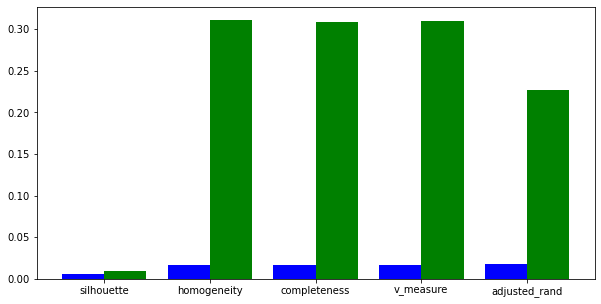

In [55]:
visualise(statistics['tfidf_2'], statistics['tfidf_6'])

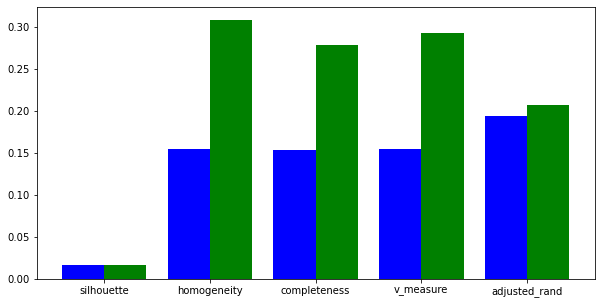

In [51]:
visualise(statistics['freq_2'], statistics['freq_6'])

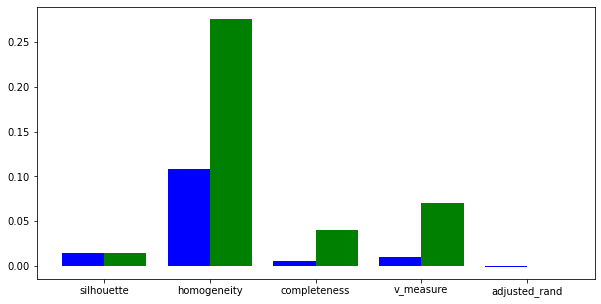

In [52]:
visualise(statistics['token_2'], statistics['token_6'])